# Reproducibility with original data

This tutorial demonstrates how to spatial data integration on Stereo-seq and Slide-seqV2 mouse olfactory bulb data using Pysodb and STAGATE based on pyG (PyTorch Geometric) framework.

A reference paper can be found at https://www.nature.com/articles/s41467-022-29439-6.

This tutorial refers to the following tutorial at https://stagate.readthedocs.io/en/latest/AT2.html. At the same time, the way of loadding data is modified by using Pysodb.

## Import packages and set configurations

In [1]:
# Use the Python warnings module to filter and ignore any warnings that may occur in the program after this point.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import several Python packages commonly used in data analysis and visualization:
# pandas (imported as pd) is a package for data manipulation and analysis
import pandas as pd
# numpy (imported as np) is a package for numerical computing with arrays
import numpy as np
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis
import scanpy as sc
import scanpy.external as sce
# matplotlib.pyplot (imported as plt) is a package for data visualization
import matplotlib.pyplot as plt
# Anndata is a package for working with annotated data.
import anndata as ad

In [3]:
# Import a STAGATE_pyG module
import STAGATE_pyG as STAGATE

In [4]:
# Imports a palettable package
import palettable
# Create two variables with lists of colors for categorical visualizations and biotechnology-related visualizations, respectively.
cmp_old = palettable.cartocolors.qualitative.Bold_10.mpl_colors
cmp_old_biotech = palettable.cartocolors.qualitative.Safe_4.mpl_colors

## Streamline development of loading spatial data with Pysodb

In [5]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb

In [6]:
# Initialization
sodb = pysodb.SODB()

### load Slide-seqV2

In [7]:
# Define names of dataset_name and experiment_name
dataset_name = 'stickels2020highly'
experiment_name = 'stickels2021highly_SlideSeqV2_Mouse_Olfactory_bulb_Puck_200127_15'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[stickels2021highly_SlideSeqV2_Mouse_Olfactory_bulb_Puck_200127_15] in dataset[stickels2020highly]


In [8]:
# Downloaded from https://drive.google.com/drive/folders/10lhz5VY7YfvHrtV40MwaqLmWz56U9eBP?usp=sharing
used_barcode = pd.read_csv('data/used_barcodes.txt', sep='\t', header=None)
used_barcode = used_barcode[0]

In [9]:
adata = adata[used_barcode,]

In [10]:
# Filter genes to retain only those present in at least 50 cells
sc.pp.filter_genes(adata, min_cells=50)
print('After flitering: ', adata.shape)

After flitering:  (20139, 11750)


In [11]:
adata

AnnData object with n_obs × n_vars = 20139 × 11750
    obs: 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [12]:
# Create a dictionary named adata_list
adata_list = {}

In [13]:
# Modify the names and save in the dictionary with the key 'SlideSeqV2'. 
adata.obs_names = [x+'_SlideSeqV2' for x in adata.obs_names]
adata_list['SlideSeqV2'] = adata.copy()

### load Stereo-seq

In [14]:
# Define names of another dataset_name and experiment_name
dataset_name = 'Fu2021Unsupervised'
experiment_name = 'StereoSeq_MOB'
# Load another specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[StereoSeq_MOB] in dataset[Fu2021Unsupervised]


In [15]:
# Filter out genes
sc.pp.filter_genes(adata, min_cells=50)
print('After flitering: ', adata.shape)

After flitering:  (19109, 14376)


In [16]:
# Update names and save in the dictionary under the key 'StereoSeq'
adata.obs_names = [x+'_StereoSeq' for x in adata.obs_names]
adata_list['StereoSeq'] = adata.copy()

## Constructing the spatial network for each secion

------Calculating spatial graph...
The graph contains 228300 edges, 20139 cells.
11.3362 neighbors per cell on average.


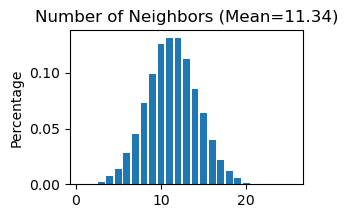

In [17]:
# Use "STAGATE_pyG.Cal_Spatial_Net" to calculate a spatial graph with a radius cutoff of 50 for adata_list['SlideSeqV2']
STAGATE.Cal_Spatial_Net(adata_list['SlideSeqV2'], rad_cutoff=50)
# Use "STAGATE_pyG.Stats_Spatial_Net" to summarize cells and edges information for adata_list['SlideSeqV2']
STAGATE.Stats_Spatial_Net(adata_list['SlideSeqV2'])

------Calculating spatial graph...
The graph contains 144318 edges, 19109 cells.
7.5524 neighbors per cell on average.


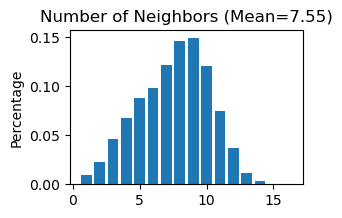

In [18]:
# Use "STAGATE_pyG.Cal_Spatial_Net" to calculate a spatial graph with a radius cutoff of 50 for adata_list['StereoSeq']
STAGATE.Cal_Spatial_Net(adata_list['StereoSeq'], rad_cutoff=50)
# Use "STAGATE_pyG.Stats_Spatial_Net" to summarize cells and edges information for adata_list['StereoSeq']
STAGATE.Stats_Spatial_Net(adata_list['StereoSeq'])

In [19]:
adata_list['SlideSeqV2'].uns['Spatial_Net']

,Cell1,Cell2,Distance
0,AAAAAAACAAAAGG_SlideSeqV2,CTCCGGGCTCTTCA_SlideSeqV2,44.777226
1,AAAAAAACAAAAGG_SlideSeqV2,ATAAGTTGCCCCGT_SlideSeqV2,41.494698
2,AAAAAAACAAAAGG_SlideSeqV2,CCAGCAAAGCTACA_SlideSeqV2,29.429237
3,AAAAAAACAAAAGG_SlideSeqV2,CCTCCTTAACGTTA_SlideSeqV2,33.634060
4,AAAAAAACAAAAGG_SlideSeqV2,ACGTTCGCTCATAT_SlideSeqV2,15.307514
...,...,...,...
9,TTTTTTTTTTTTAT_SlideSeqV2,CTGACTTTAATCTA_SlideSeqV2,46.076567
10,TTTTTTTTTTTTAT_SlideSeqV2,CCTATAACAGCCTG_SlideSeqV2,30.802922
11,TTTTTTTTTTTTAT_SlideSeqV2,CTTGGGCATATAAG_SlideSeqV2,37.316216
12,TTTTTTTTTTTTAT_SlideSeqV2,CGGCAGGGATCCCT_SlideSeqV2,47.548291


In [20]:
# Concatenate 'SlideSeqV2' and 'StereoSeq' into a single AnnData object named 'adata'
adata = sc.concat([adata_list['SlideSeqV2'], adata_list['StereoSeq']], keys=None)

In [21]:
# Concatenate two 'Spatial_Net'
adata.uns['Spatial_Net'] = pd.concat([adata_list['SlideSeqV2'].uns['Spatial_Net'], adata_list['StereoSeq'].uns['Spatial_Net']])

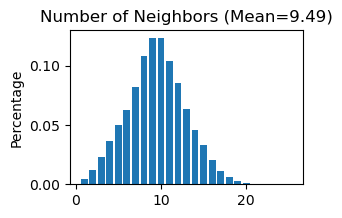

In [22]:
# Use "STAGATE_pyG.Stats_Spatial_Net" to summarize cells and edges information for whole adata
STAGATE.Stats_Spatial_Net(adata)

In [23]:
# Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [24]:
adata

AnnData object with n_obs × n_vars = 39248 × 10782
    obs: 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'hvg', 'log1p'
    obsm: 'X_pca', 'X_umap', 'spatial'

## Running STAGATE

In [25]:
adata = STAGATE.train_STAGATE(adata, n_epochs=500, device='cpu')

Size of Input:  (39248, 3000)


100%|██████████| 500/500 [1:41:41<00:00, 12.20s/it]


## Spatial Clustering

In [26]:
# Create a new column 'Tech' by splitting each name and selecting the last element
adata.obs['Tech'] = [x.split('_')[-1] for x in adata.obs_names]

In [27]:
# Calculates neighbors in the 'STAGATE' representation, applies UMAP, and performs louvain clustering 
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.tl.louvain(adata,resolution=0.3)

<Axes: title={'center': 'Unintegrated'}, xlabel='UMAP1', ylabel='UMAP2'>

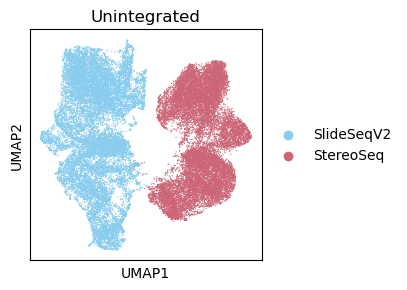

In [28]:
# Plot a UMAP projection
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color='Tech', title='Unintegrated',show=False,palette=cmp_old_biotech)
#plt.savefig('figures/old_before_umap.png',dpi=400,transparent=True,bbox_inches='tight')
#plt.savefig('figures/old_before_umap.pdf',dpi=400,transparent=True,bbox_inches='tight')

<Axes: title={'center': 'louvain'}, xlabel='UMAP1', ylabel='UMAP2'>

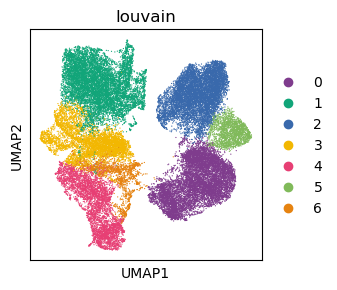

In [29]:
# Generate a plot of the UMAP embedding colored by louvain
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color='louvain',show=False,palette=cmp_old)
#plt.savefig('figures/old_before_umap_leiden.png',dpi=400,transparent=True,bbox_inches='tight')
#plt.savefig('figures/old_before_umap_leiden.pdf',dpi=400,transparent=True,bbox_inches='tight')

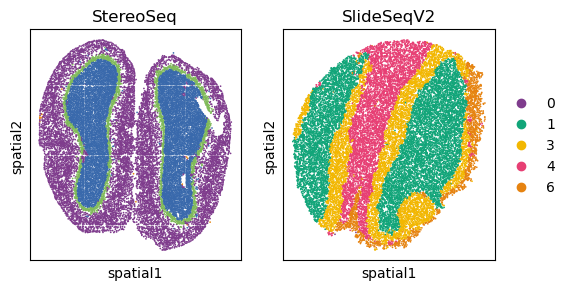

In [30]:
# Display spatial distribution of cells colored by louvain clustering for two sequencing technologies ('StereoSeq' and 'SlideSeqV2')
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
it=0
for temp_tech in ['StereoSeq', 'SlideSeqV2']:
    temp_adata = adata[adata.obs['Tech']==temp_tech, ]
    if it == 1:
        sc.pl.embedding(temp_adata, basis="spatial", color="louvain",s=6, ax=axs[it],
                        show=False, title=temp_tech)
    else:
        sc.pl.embedding(temp_adata, basis="spatial", color="louvain",s=6, ax=axs[it], legend_loc=None,
                        show=False, title=temp_tech)
    it+=1
#plt.savefig('figures/old_before_spatial_leiden0.3.png',dpi=400,transparent=True,bbox_inches='tight')
#plt.savefig('figures/old_before_spatial_leiden0.3.pdf',dpi=400,transparent=True,bbox_inches='tight')

## Perform Harmony for spatial data intergration

Harmony is an algorithm for integrating multiple high-dimensional datasets
It can be employed as a reference at https://github.com/slowkow/harmonypy and https://pypi.org/project/harmonypy/

In [31]:
# Import harmonypy package
import harmonypy as hm

In [32]:
# Use STAGATE representation to create 'meta_data' for harmony
data_mat = adata.obsm['STAGATE'].copy()
meta_data = adata.obs.copy()

In [33]:
# Run harmony for STAGATE representation
ho = hm.run_harmony(data_mat, meta_data, ['Tech'])

2023-04-03 11:20:28,820 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-04-03 11:20:34,852 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-04-03 11:20:34,995 - harmonypy - INFO - Iteration 1 of 10
2023-04-03 11:20:42,857 - harmonypy - INFO - Iteration 2 of 10
2023-04-03 11:20:50,987 - harmonypy - INFO - Iteration 3 of 10
2023-04-03 11:20:58,029 - harmonypy - INFO - Converged after 3 iterations


In [34]:
# Write the adjusted PCs to a new file.
res = pd.DataFrame(ho.Z_corr)
res.columns = adata.obs_names

In [35]:
# Creates a new AnnData object adata_Harmony using a transpose of the res matrix
adata_Harmony = sc.AnnData(res.T)

In [36]:
adata_Harmony.obsm['spatial'] = pd.DataFrame(adata.obsm['spatial'], index=adata.obs_names).loc[adata_Harmony.obs_names,].values
adata_Harmony.obs['Tech'] = adata.obs.loc[adata_Harmony.obs_names, 'Tech']

## Spatial Clustering after integration

In [37]:
# Calculate neighbors, apply UMAP, and perform louvain clustering for the integrated data
sc.pp.neighbors(adata_Harmony)
sc.tl.umap(adata_Harmony)
sc.tl.louvain(adata_Harmony, resolution=0.3)

<Axes: title={'center': 'STAGATE + Harmony'}, xlabel='UMAP1', ylabel='UMAP2'>

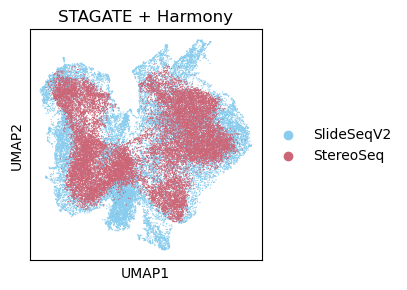

In [38]:
# Plot a UMAP embedding colored by louvain after integration
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata_Harmony, color='Tech', title='STAGATE + Harmony',show=False,palette=cmp_old_biotech)
#plt.savefig('figures/old_after_umap.png',dpi=400,transparent=True,bbox_inches='tight')
#plt.savefig('figures/old_after_umap.pdf',dpi=400,transparent=True,bbox_inches='tight')

<Axes: title={'center': 'louvain'}, xlabel='UMAP1', ylabel='UMAP2'>

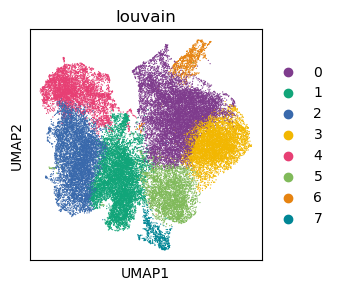

In [39]:
# Display spatial distribution of cells colored by louvain clustering for two sequencing technologies ('StereoSeq' and 'SlideSeqV2') after integration
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata_Harmony, color='louvain',show=False,palette=cmp_old)
#plt.savefig('figures/old_after_umap_leiden0.4.png',dpi=400,transparent=True,bbox_inches='tight')
#plt.savefig('figures/old_after_umap_leiden0.4.pdf',dpi=400,transparent=True,bbox_inches='tight')

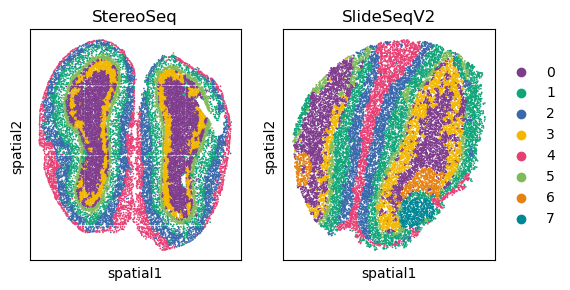

In [40]:
# Display spatial distribution of cells colored by louvain clustering for two sequencing technologies ('StereoSeq' and 'SlideSeqV2') after integration
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
it=0
for temp_tech in ['StereoSeq', 'SlideSeqV2']:
    temp_adata = adata_Harmony[adata_Harmony.obs['Tech']==temp_tech, ]
    if it == 1:
        sc.pl.embedding(temp_adata, basis="spatial", color="louvain",s=6, ax=axs[it],
                        show=False, title=temp_tech)
    else:
        sc.pl.embedding(temp_adata, basis="spatial", color="louvain",s=6, ax=axs[it], legend_loc=None,
                        show=False, title=temp_tech)
    it+=1
#plt.savefig('figures/old_after_spatial_leiden0.4.png',dpi=400,transparent=True,bbox_inches='tight')
#plt.savefig('figures/old_after_spatial_leiden0.4.pdf',dpi=400,transparent=True,bbox_inches='tight')